<a href="https://colab.research.google.com/github/MrDerrs/Phishing-with-Machine-Learning/blob/master/ML_Phishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load Phishing.csv into a dataframe
df = pd.read_csv('/content/Phishing.csv')
shape = df.shape
info = df.info

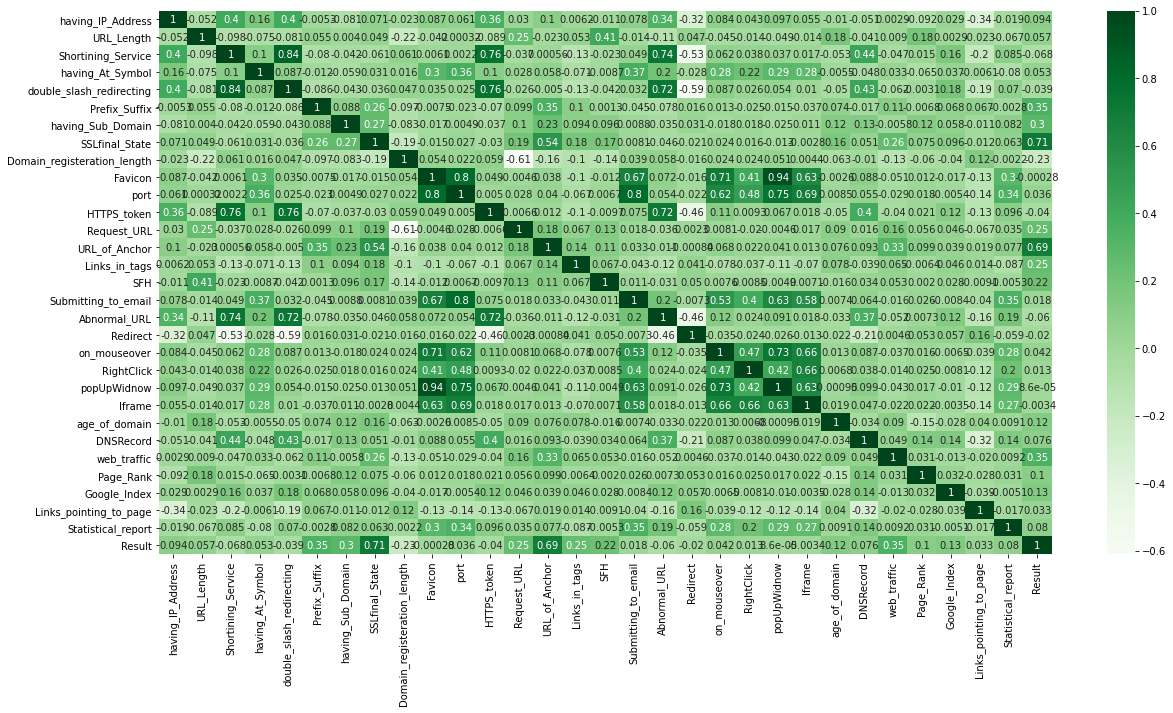

In [31]:
# Correlation Matrix 
print("This is a Correlation Matrix for all the attritbutes")
corrMatrix = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corrMatrix, annot=True, cmap='Greens')
plt.show()

In [32]:
#Building a Dataframe with all the counted values
columnNames = []
valueCounts = pd.DataFrame(columns = columnNames)
for c in df.columns:
    values = df[c].value_counts()
    valueCounts = valueCounts.append(values)

valueCounts.columns = ['Legit','Phish','Suspect']
counts_with_suspect = valueCounts.dropna()
print("These are the Columns that contain suspisious domains.")
counts_with_suspect_sorted = counts_with_suspect.sort_values('Suspect' , ascending=False)
counts_with_suspect_sorted



These are the Columns that contain suspisious domains.


,Legit,Phish,Suspect
Links_pointing_to_page,548.0,4351.0,6156.0
URL_of_Anchor,3282.0,2436.0,5337.0
Links_in_tags,3956.0,2650.0,4449.0
having_Sub_Domain,3363.0,4070.0,3622.0
web_traffic,2655.0,5831.0,2569.0
SSLfinal_State,3557.0,6331.0,1167.0
SFH,8440.0,1854.0,761.0
URL_Length,8960.0,1960.0,135.0


In [33]:
valueCounts['Diff'] = valueCounts['Legit'] - valueCounts['Phish']
valueCountsSorted = valueCounts.sort_values('Diff')
valueCountsSorted

print("These are the Attributes that highly favor Phishing Emails")
valueCountsSorted[['Legit','Phish','Diff']].head()

These are the Attributes that highly favor Phishing Emails


,Legit,Phish,Diff
RightClick,476.0,10579.0,-10103.0
Iframe,1012.0,10043.0,-9031.0
on_mouseover,1315.0,9740.0,-8425.0
double_slash_redirecting,1429.0,9626.0,-8197.0
Shortining_Service,1444.0,9611.0,-8167.0


In [34]:
print("These are the Attributes that highly favor Legitmate Emails")
valueCountsSorted[['Legit','Phish','Diff']].tail(6)

These are the Attributes that highly favor Legitmate Emails


,Legit,Phish,Diff
Domain_registeration_length,7389.0,3666.0,3723.0
Page_Rank,8201.0,2854.0,5347.0
SFH,8440.0,1854.0,6586.0
URL_Length,8960.0,1960.0,7000.0
Prefix_Suffix,9590.0,1465.0,8125.0
Redirect,NaN,1279.0,NaN


In [46]:
valueCounts.describe()

,Legit,Phish,Suspect,Diff
count,30.000000,31.000000,9.000000,30.000000
mean,3443.666667,6626.548387,3774.666667,-3361.133333
std,2627.815906,3109.375927,3065.709257,5360.043108
min,476.000000,1279.000000,135.000000,-10103.000000
25%,1541.750000,3868.000000,1167.000000,-7915.500000
50%,2396.000000,7262.000000,3622.000000,-3986.000000
75%,4360.250000,9465.500000,5337.000000,-684.500000
max,9590.000000,10579.000000,9776.000000,8125.000000


In [65]:
num_legit_result = valueCounts.at['Result','Legit']
num_phish_result = valueCounts.at['Result','Phish']
total = num_legit_result + num_phish_result
percent_legit = round((num_legit_result / total) * 100,2)
percent_phish = round((num_phish_result / total) * 100,2)
print("Total Number of Data Rows:", total)
print("Legitmate Results: " , num_legit_result , ":" , percent_legit , "%")
print("Phishing Results: ", num_phish_result , ":" , percent_phish , "%")



Total Number of Data Rows: 11055.0
Legitmate Results:  4898.0 : 44.31 %
Phishing Results:  6157.0 : 55.69 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


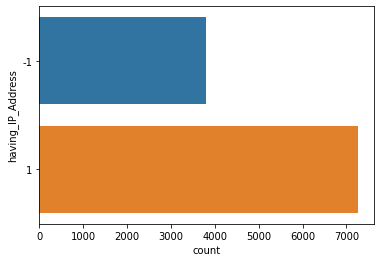

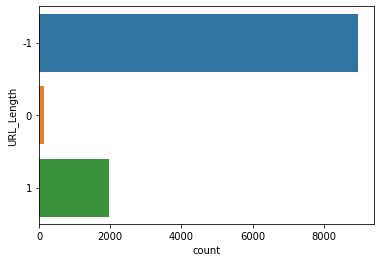

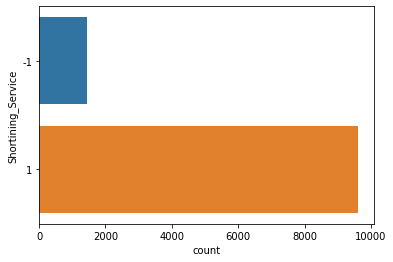

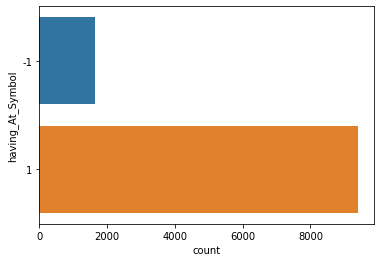

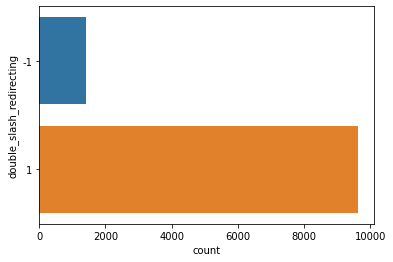

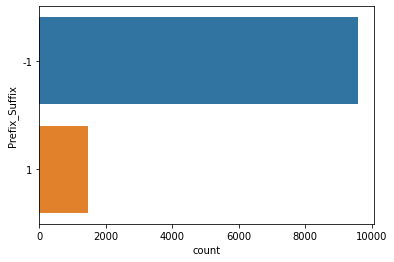

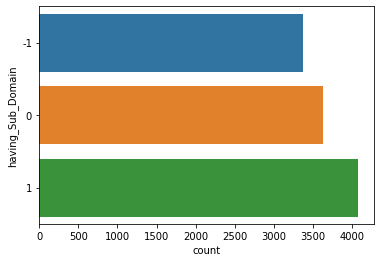

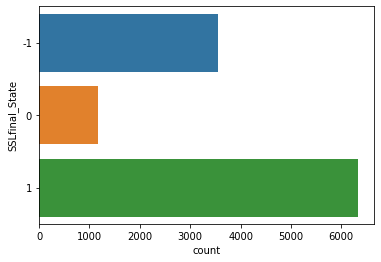

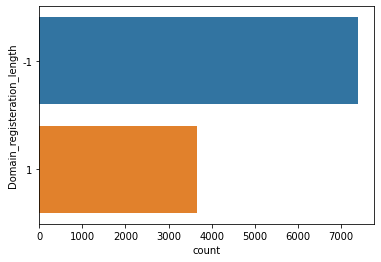

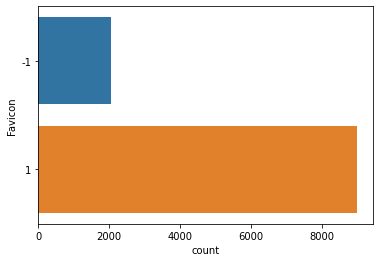

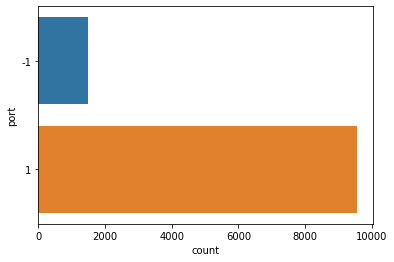

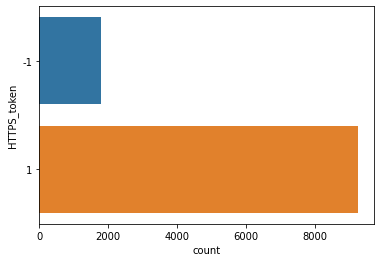

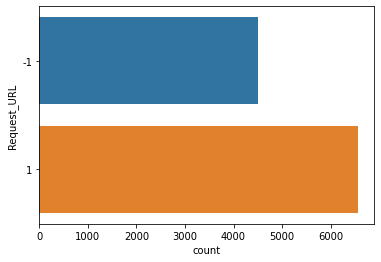

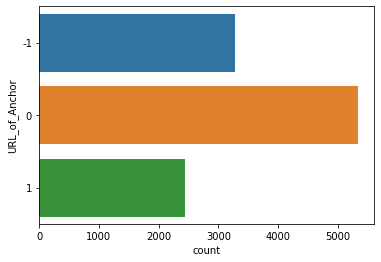

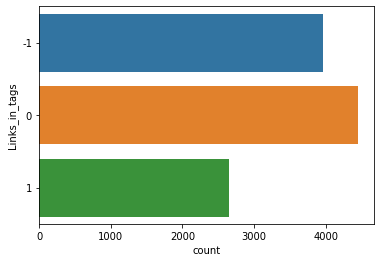

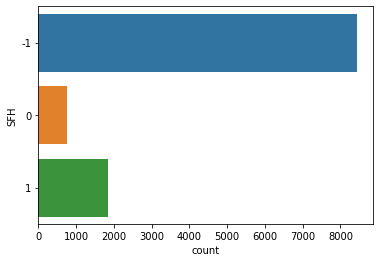

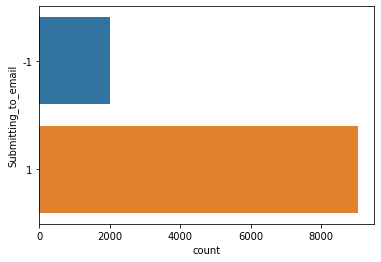

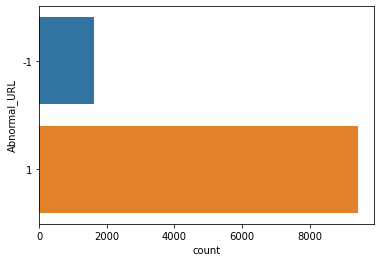

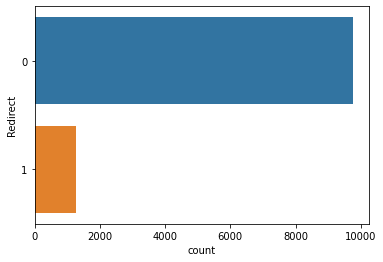

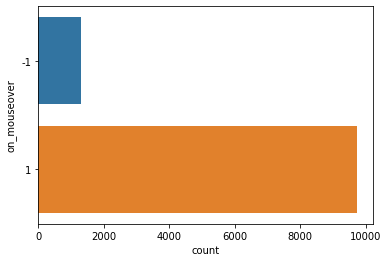

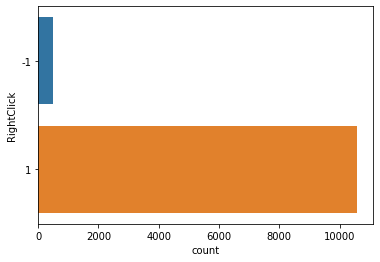

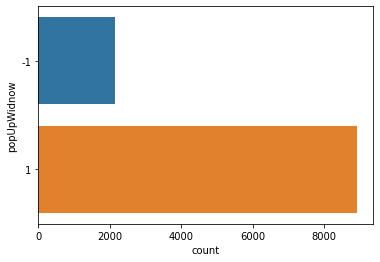

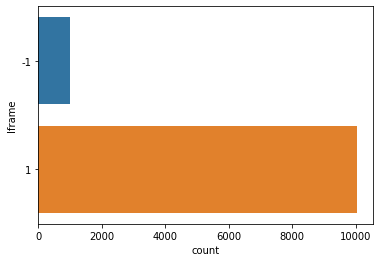

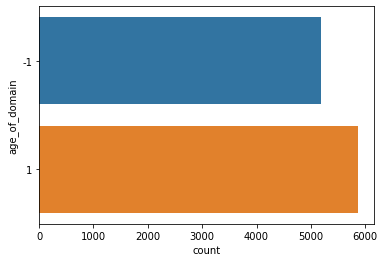

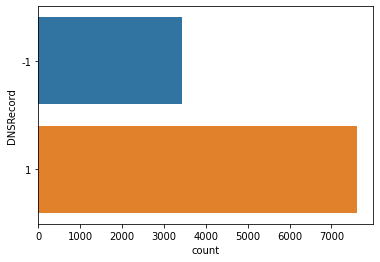

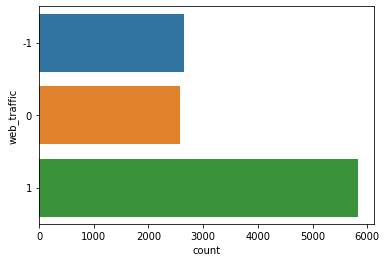

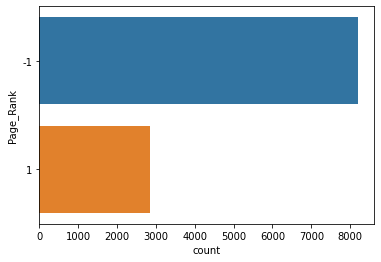

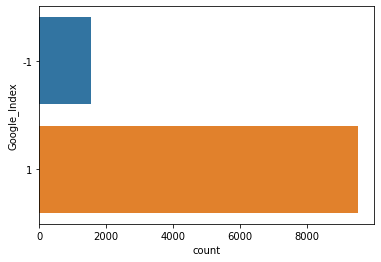

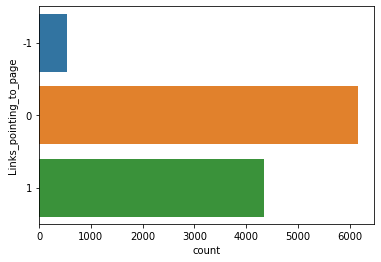

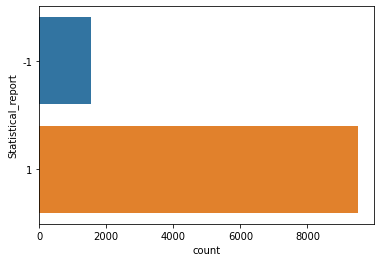

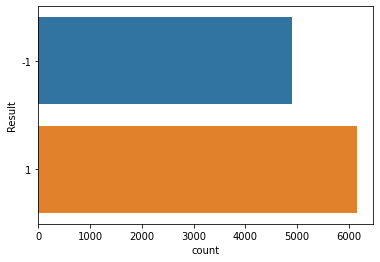

In [78]:
for c in df.columns:
  plt.figure()
  sns.countplot(y=df[c])